In [2]:
#consider conventional multivariate timeseries models like 
#SARIMAX first as they are more interpretable ...avoid the urge :D!
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../FINAL-TF2-FILES/TF_2_Notebooks_and_Data/DATA/energydata_complete.csv',
                index_col='date',infer_datetime_format=True)

In [4]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null fl

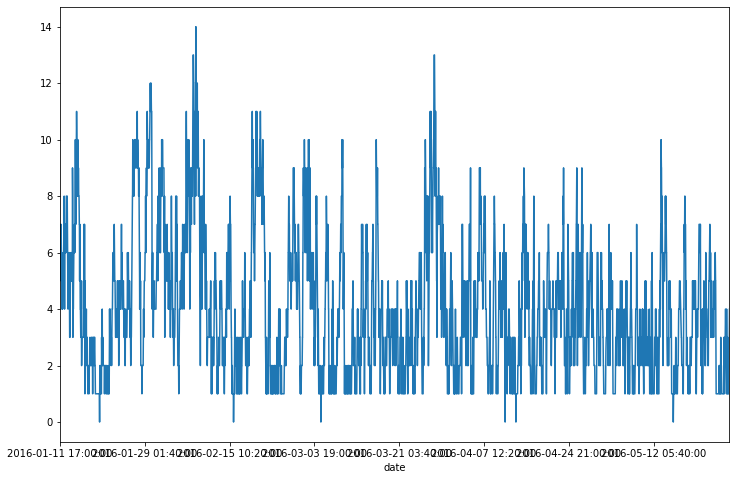

In [6]:
df['Windspeed'].plot(figsize=(12,8))

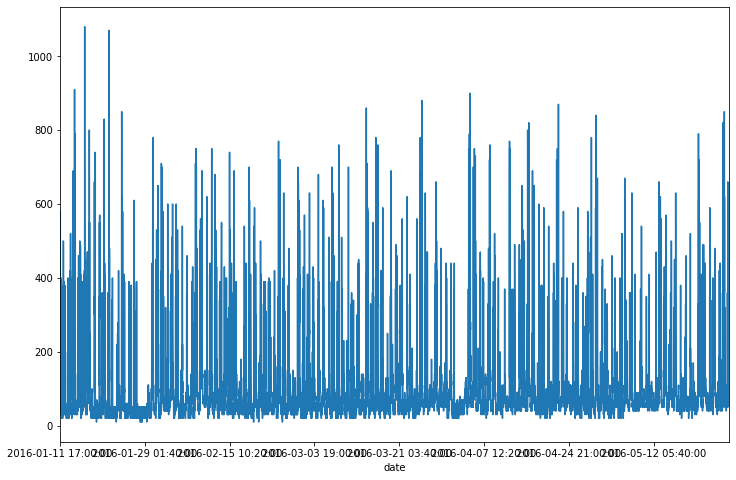

In [7]:
df['Appliances'].plot(figsize=(12,8))

In [8]:
len(df)

19735

In [9]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [10]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [12]:
# to predict the next 24 hrs the full datae is not requird...so sampling
df=df.loc['2016-05-01':]

In [13]:
#data has a lot of high precision(decimal points) which is 
#unecessary an will only lead to noise...so rounding

df=df.round(2)

In [14]:
len(df)

3853

In [17]:
# no of rows per day given data is every 30 mins
24*60/10

144.0

In [16]:
test_days = 2

In [18]:
test_ind=test_days*144

In [19]:
test_ind

288

In [20]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [21]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [22]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [29]:
len(test)

288

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
length = 144
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [32]:
len(scaled_train),len(generator)

(3565, 3421)

In [33]:
X,y =generator[0]

In [35]:
print(f'Given the Array: \n{X.flatten()}')
print('\n')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]


Predict this y: 
[[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [38]:
scaled_train.shape

(3565, 28)

In [39]:
n_features=scaled_train.shape[1]

In [40]:
n_features #multivariate

28

In [41]:
model = Sequential()
model.add(LSTM(25,input_shape=(length,n_features)))
model.add(Dense(n_features))#one neuron per feature as it is a multivariate problem
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                5400      
_________________________________________________________________
dense (Dense)                (None, 28)                728       
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=batch_size)

In [43]:
model.fit_generator(generator,epochs=2,validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/2
3421/3421 [==============================] - 1776s 519ms/step - loss: 0.0157 - val_loss: 0.0144
Epoch 2/2
3421/3421 [==============================] - 1888s 552ms/step - loss: 0.0090 - val_loss: 0.0105


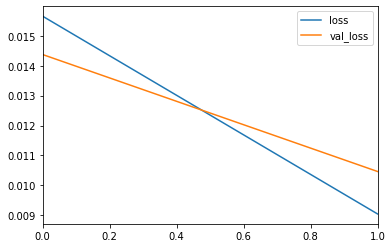

In [59]:
pd.DataFrame(model.history.history).plot() #train for more epochs when you have the resource :(

In [44]:
first_eval_batch =scaled_train[-length:]

In [45]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [46]:
model.predict(first_eval_batch)

array([[ 0.16093278, -0.01084473,  0.6781691 ,  0.38965937,  0.55996126,
         0.41650593,  0.41002762,  0.44543254,  0.6880684 ,  0.3530494 ,
         0.31112394,  0.3558033 ,  0.65976274, -0.0050203 ,  0.6231594 ,
         0.41802496,  0.502984  ,  0.31663898,  0.53982025,  0.33594623,
         0.6596891 ,  0.53089994,  0.42239594,  0.22173616,  0.54636055,
         0.5179853 ,  0.50694263,  0.4835542 ]], dtype=float32)

In [47]:
# now putting it all in a for loop
test_prediction =[]
first_eval_batch = scaled_train[-length:]
# reshape before feeding into network for prediction
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range (len(test)):
    # get predicition 1 timestamp ahead..[0] is subscripting for just prediction value in returned predict object
    current_pred = model.predict(current_batch)[0]
    # append current prediction
    test_prediction.append(current_pred)
    # update batch to include current prediction and drop the first value thus 
    #moving current batch one step into the future
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [48]:
test_prediction

[array([ 0.16093278, -0.01084473,  0.6781691 ,  0.38965937,  0.55996126,
         0.41650593,  0.41002762,  0.44543254,  0.6880684 ,  0.3530494 ,
         0.31112394,  0.3558033 ,  0.65976274, -0.0050203 ,  0.6231594 ,
         0.41802496,  0.502984  ,  0.31663898,  0.53982025,  0.33594623,
         0.6596891 ,  0.53089994,  0.42239594,  0.22173616,  0.54636055,
         0.5179853 ,  0.50694263,  0.4835542 ], dtype=float32),
 array([ 0.17617537, -0.00122546,  0.66445976,  0.39254797,  0.56382006,
         0.41152573,  0.41070452,  0.43412614,  0.68187517,  0.35476506,
         0.31983122,  0.3561885 ,  0.66714597, -0.01347128,  0.62177616,
         0.41380334,  0.4871602 ,  0.3142014 ,  0.551975  ,  0.34427813,
         0.655828  ,  0.5327915 ,  0.42129365,  0.24118914,  0.5429787 ,
         0.51591194,  0.5036307 ,  0.48384947], dtype=float32),
 array([ 0.18487352,  0.0049654 ,  0.658295  ,  0.3959644 ,  0.57003266,
         0.40900618,  0.4121096 ,  0.4297295 ,  0.6772923 ,  0.356093

In [49]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [53]:
true_predictions = scaler.inverse_transform(test_prediction)

In [54]:
true_predictions

array([[ 1.43918240e+02, -3.25341811e-01,  2.43708525e+01, ...,
         7.35395131e+00,  2.53419232e+01,  2.41732041e+01],
       [ 1.55655036e+02, -3.67637817e-02,  2.42903788e+01, ...,
         7.31891173e+00,  2.51764260e+01,  2.41879578e+01],
       [ 1.62352611e+02,  1.48961982e-01,  2.42541915e+01, ...,
         7.37445729e+00,  2.50907034e+01,  2.43789773e+01],
       ...,
       [ 3.82817589e+02, -2.09311679e+00,  2.11649332e+01, ...,
         3.47304224e+00,  2.52174123e+01,  3.24694382e+01],
       [ 3.82817612e+02, -2.09311746e+00,  2.11649330e+01, ...,
         3.47304224e+00,  2.52174153e+01,  3.24694382e+01],
       [ 3.82817612e+02, -2.09311746e+00,  2.11649332e+01, ...,
         3.47304173e+00,  2.52174153e+01,  3.24694382e+01]])

In [55]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [56]:
true_predictions =pd.DataFrame(data=true_predictions,columns=test.columns)

In [57]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,143.918240,-0.325342,24.370852,37.794082,24.372717,34.467095,25.027597,37.197584,24.016479,36.501209,...,22.015029,37.136674,17.796415,756.204519,56.102092,2.217362,37.781633,7.353951,25.341923,24.173204
1,155.655036,-0.036764,24.290379,37.873951,24.420836,34.299610,25.032430,36.983667,23.973126,36.539022,...,22.080665,37.317393,17.702203,756.247646,56.018317,2.411891,37.578722,7.318912,25.176426,24.187958
2,162.352611,0.148962,24.254192,37.968416,24.498307,34.214878,25.042463,36.900482,23.941046,36.568304,...,22.128459,37.465298,17.748241,756.383937,55.928017,2.624121,37.337695,7.374457,25.090703,24.378977
3,168.213408,0.274480,24.226460,38.052521,24.585675,34.091936,25.050598,36.831276,23.910598,36.608371,...,22.173147,37.563424,17.842193,756.566812,55.683418,2.832943,37.133508,7.426744,25.037812,24.591929
4,173.871013,0.356049,24.204366,38.123116,24.680716,33.942740,25.056337,36.757611,23.883757,36.651653,...,22.215156,37.626226,17.965677,756.781126,55.332204,3.042177,36.938876,7.468280,25.002392,24.816920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,382.817681,-2.093115,21.164933,40.685680,21.171503,32.468666,22.223870,33.446172,20.739501,36.201774,...,21.401150,32.199431,18.385069,778.363671,33.372538,12.747899,32.997824,3.473043,25.217415,32.469441
284,382.817635,-2.093116,21.164933,40.685675,21.171502,32.468666,22.223869,33.446171,20.739501,36.201772,...,21.401150,32.199429,18.385069,778.363671,33.372537,12.747899,32.997820,3.473044,25.217412,32.469438
285,382.817589,-2.093117,21.164933,40.685675,21.171502,32.468664,22.223869,33.446171,20.739500,36.201772,...,21.401150,32.199428,18.385070,778.363671,33.372534,12.747898,32.997819,3.473042,25.217412,32.469438
286,382.817612,-2.093117,21.164933,40.685673,21.171501,32.468662,22.223869,33.446171,20.739500,36.201771,...,21.401150,32.199429,18.385069,778.363671,33.372532,12.747897,32.997822,3.473042,25.217415,32.469438


In [58]:
# to evaluate use rmse on feature by feature basis OR 
#come up with a weighting regimen if you want to calculate rmse acros all features BUT
#remember to do this (i.e. over all features) on scaled_prediction vs scaled_test as the 
#features have different scales

In [ ]:
#play around with parameters ...train for more epochs..